In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pickle
import os
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
pip install numpy pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option("display.max_columns", None)

# Set seaborn style (modern way)
sns.set_theme(style="whitegrid")

# Set font weights and sizes
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [10]:
SPLIT_METHOD = 'time'  # 'time' or 'random'
DATA_PATH = r"C:\Users\preet\OneDrive\Documents\day.csv"
OUTPUT_DIR = "."
df = pd.read_csv(DATA_PATH)

Data Inspection

In [11]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (730, 16) 
 Total Rows are : 730
 Total Columns are : 16


In [12]:
required_cols = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

missing_required = [c for c in required_cols if c not in df.columns]
if missing_required:
    print("Warning: expected columns missing in dataset:", missing_required)
else:
    print("All expected columns present.")

All expected columns present.


In [13]:
# Check 1st Five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Check last 5 rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [15]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [16]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,31-12-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


Obeservations

In [18]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [19]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
        print(f"Found {duplicates} duplicate rows. Removing them.")
        df = df.drop_duplicates()
else:
        print("No duplicate rows found.")

No duplicate rows found.


In [20]:
# Check for missing values
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"Found {missing_values} missing values. Handling them.")
    df = df.dropna()  # Drop rows with any missing values
else:
    print("No missing values found.")

No missing values found.


In [21]:
#Get distinct categories counts forSeasons categories
df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [22]:
#Get distinct categories counts for Holiday categories
df['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [23]:
df['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [24]:
df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [25]:
#Get distinct categories counts for for Month categories
df['mnth'].value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64

Data Cleaning

In [26]:
#1. Drop unnecessary columns - to prevent leakage
#Drop the original datetime column as it can't be used directly in ML models
df = df.drop('dteday', axis=1)
print("Dropped original dteday column")

Dropped original dteday column


In [27]:
df = df.drop('atemp', axis=1)
print("Dropped 'atemp' column.")

Dropped 'atemp' column.


In [28]:
columns_to_drop = ['instant', 'casual', 'registered']
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns that leak target or are irrelevant: {columns_to_drop}")

Dropped columns that leak target or are irrelevant: ['instant', 'casual', 'registered']


In [29]:
# Inspect after drops
print("\nAfter dropping leakage columns, shape:", df.shape)
display(df.head())


After dropping leakage columns, shape: (730, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [30]:
# Handle missing values (simple strategy)
print("\nMissing values after datetime parsing and drops:")
print(df.isna().sum())


Missing values after datetime parsing and drops:
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64


In [31]:
#2. Create new relevant features
# Create is_weekend feature (1 if weekend, 0 otherwise), Weekend is when weekday is 0 (Saturday) or 6 (Sunday)

df['is_weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created is_weekend feature (1 for weekend, 0 for weekday)")

Created is_weekend feature (1 for weekend, 0 for weekday)


In [32]:
#Get distinct categories counts for for weekend categories
df['is_weekend'].value_counts()

is_weekend
0    520
1    210
Name: count, dtype: int64

In [33]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
predictor_numeric = [c for c in numeric_cols if c != 'cnt']
if df[predictor_numeric].isna().sum().sum() > 0:
    for col in predictor_numeric:
        if df[col].isna().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

In [34]:
# 3. Decide categorical vs numeric features
# Candidate categorical columns commonly in 'day' dataset:

candidate_cat = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'year', 'mnth', 'is_weekend']
#Filter valid categorical columns from dataframe
categorical_cols = [c for c in candidate_cat if c in df.columns and df[c].dtype != 'float64']

#Verify categorical nature based on unique values
categorical_cols = [c for c in categorical_cols if df[c].nunique() <= 20]

# Numeric features: all numeric predictors excluding target and categorical cols
numeric_features = [c for c in predictor_numeric if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_features)

Categorical columns: ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth', 'is_weekend']
Numeric columns: ['temp', 'hum', 'windspeed']


In [35]:
## Check the Summary of Bike data to egt mean,max,25%,50%,75% etc
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,is_weekend
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849,0.287671
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647,0.452987
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000,0.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000,1.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000,1.000000


Exploratory Data Analysis

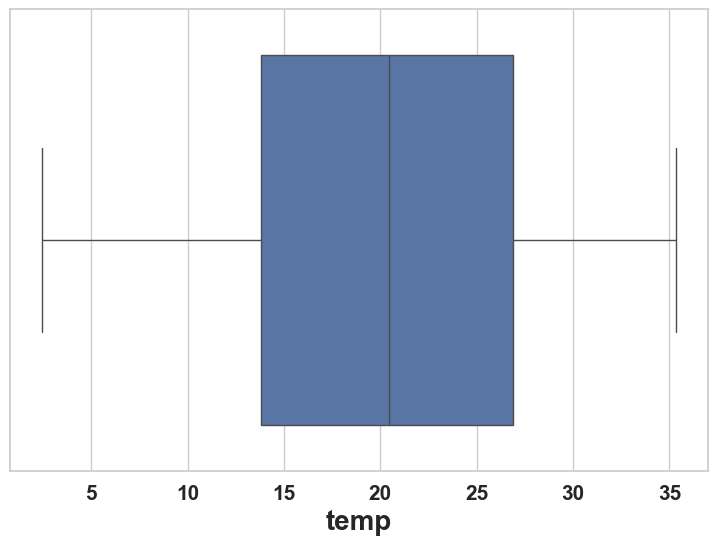

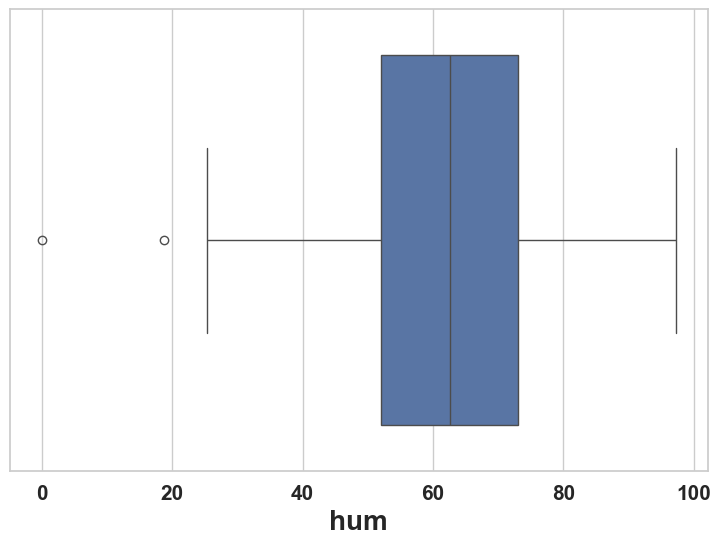

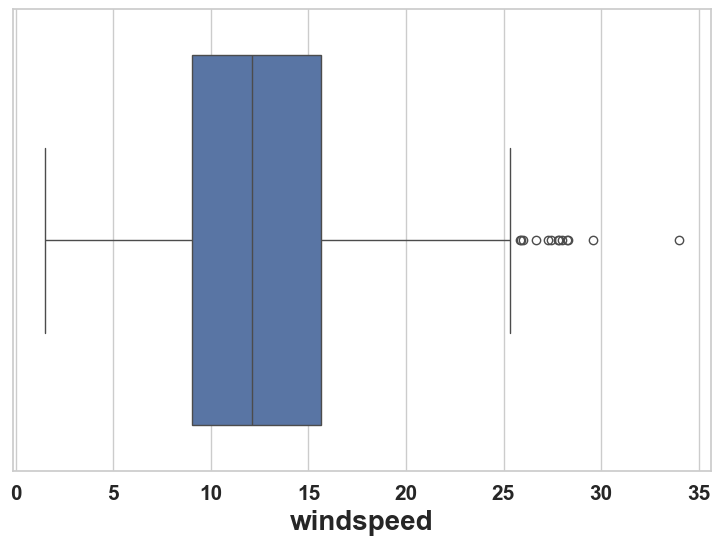

In [36]:
# plotting box plot of numeric columns to check oultliers
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

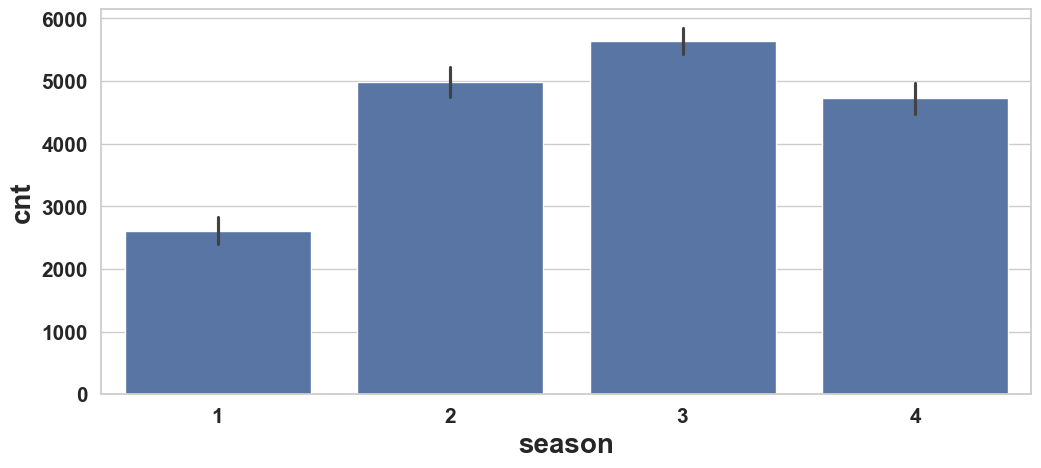

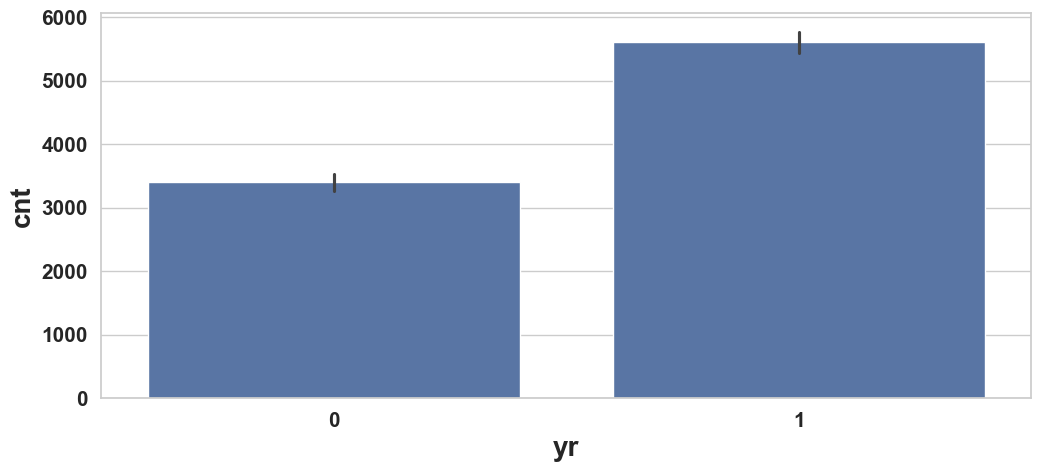

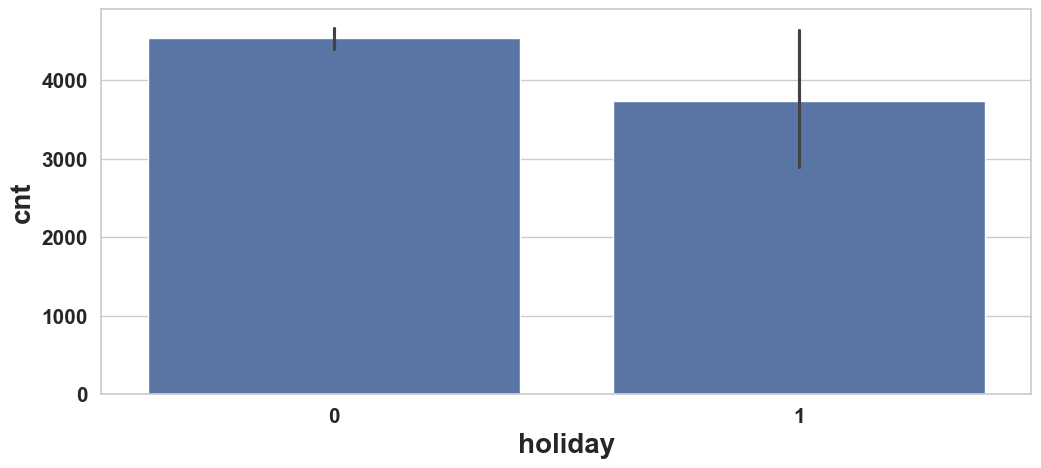

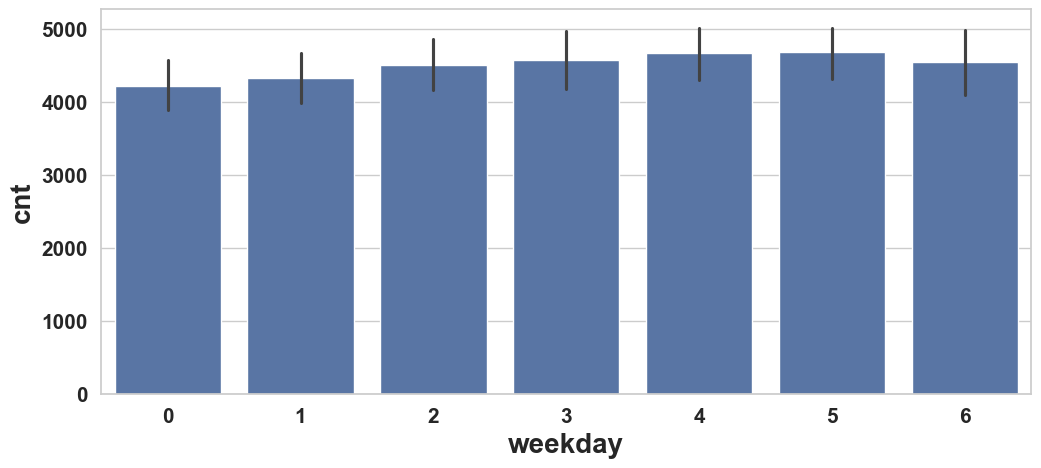

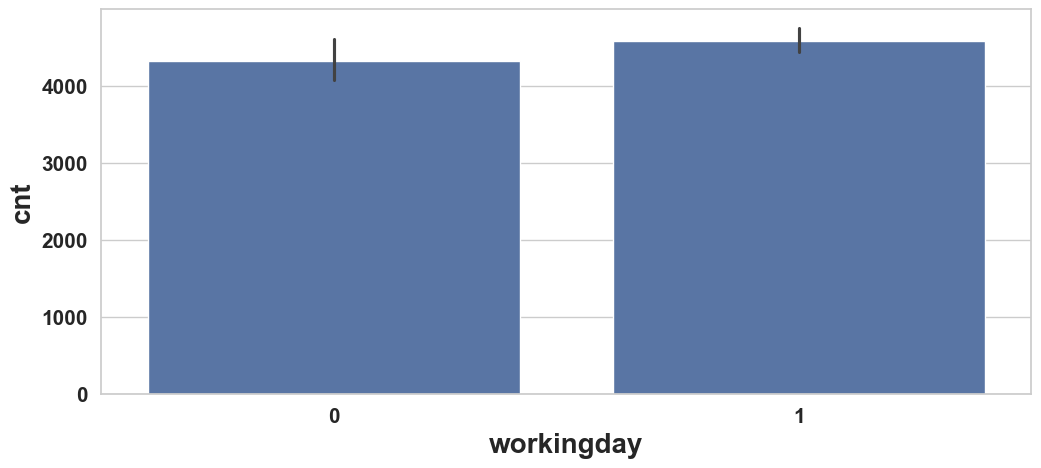

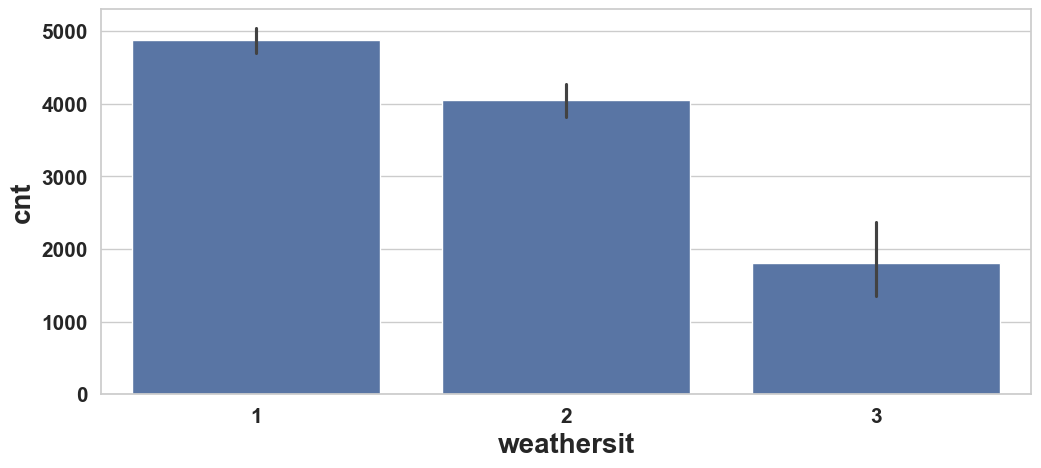

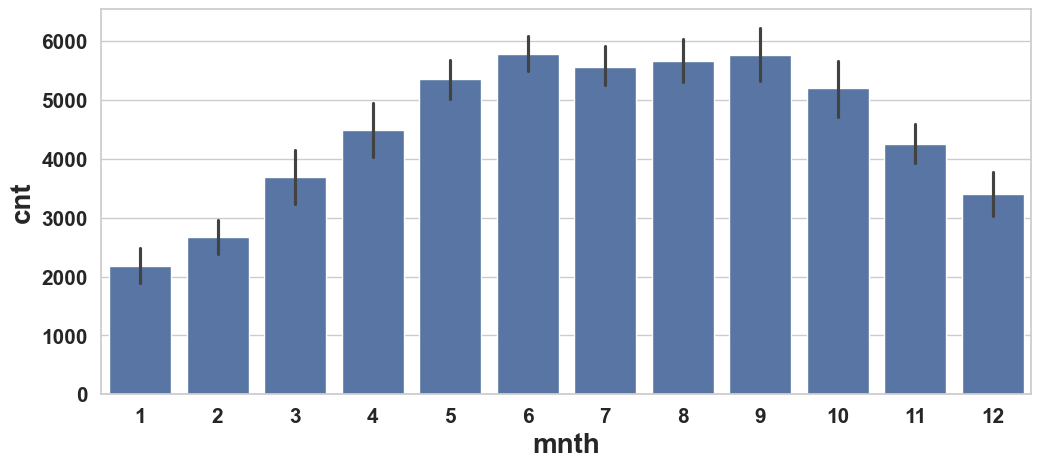

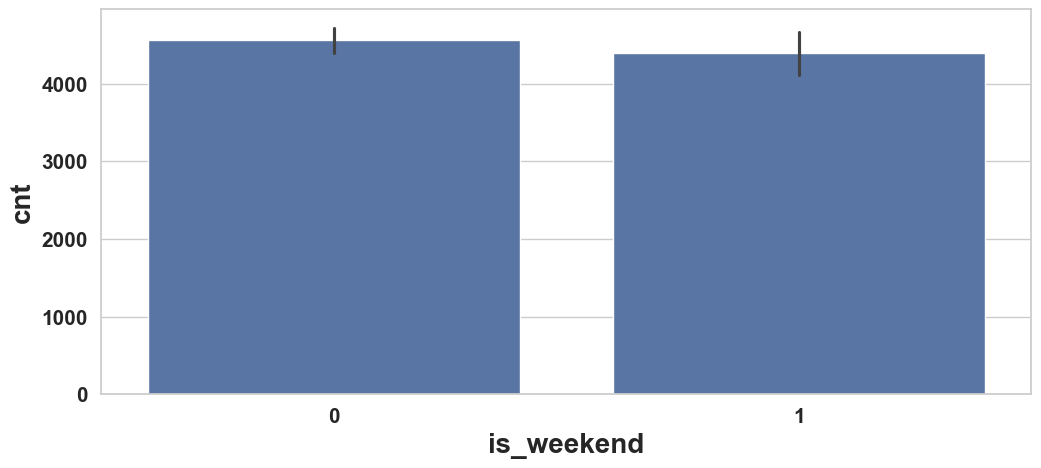

In [37]:
# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_cols:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = df[col],y = df['cnt'])

Dependent variable (Bike count) Vs Categorical columns

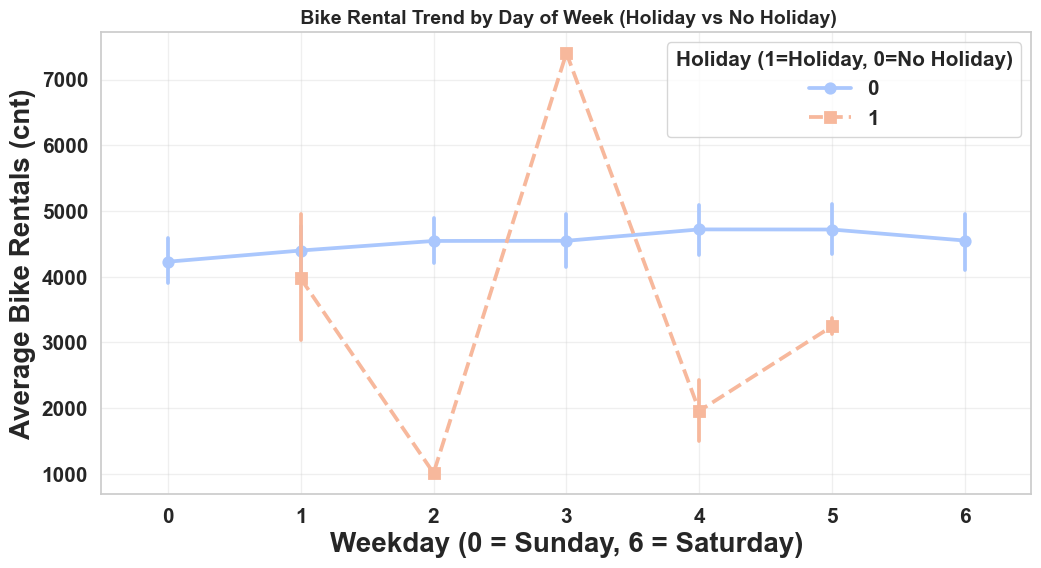

In [38]:
plt.figure(figsize=(12,6))
sns.pointplot(
    data=df,
    x="weekday",
    y="cnt",
    hue="holiday",
    palette="coolwarm",
    markers=["o", "s"],
    linestyles=["-", "--"]
)
plt.title(" Bike Rental Trend by Day of Week (Holiday vs No Holiday)", fontsize=14)
plt.xlabel("Weekday (0 = Sunday, 6 = Saturday)")
plt.ylabel("Average Bike Rentals (cnt)")
plt.legend(title="Holiday (1=Holiday, 0=No Holiday)")
plt.grid(True, alpha=0.3)
plt.show()

Observation
On non holidays (including weekends- regular holidays), the average number of bike rentals remains relatively stable throughout the week. There is slight increase during the middle of the week (Tuesday to Friday).

On holidays, There is a massive peak in bike rentals on Wednesday (weekday = 3), the lowest number of holiday rentals occurs on Tuesday (weekday = 2)

The average bike rentals on holidays are generally lower than non-holidays, except for the significant peak on Wednesday.

Text(0.5, 1.0, 'Bike Rental Trend according to day on working day ')

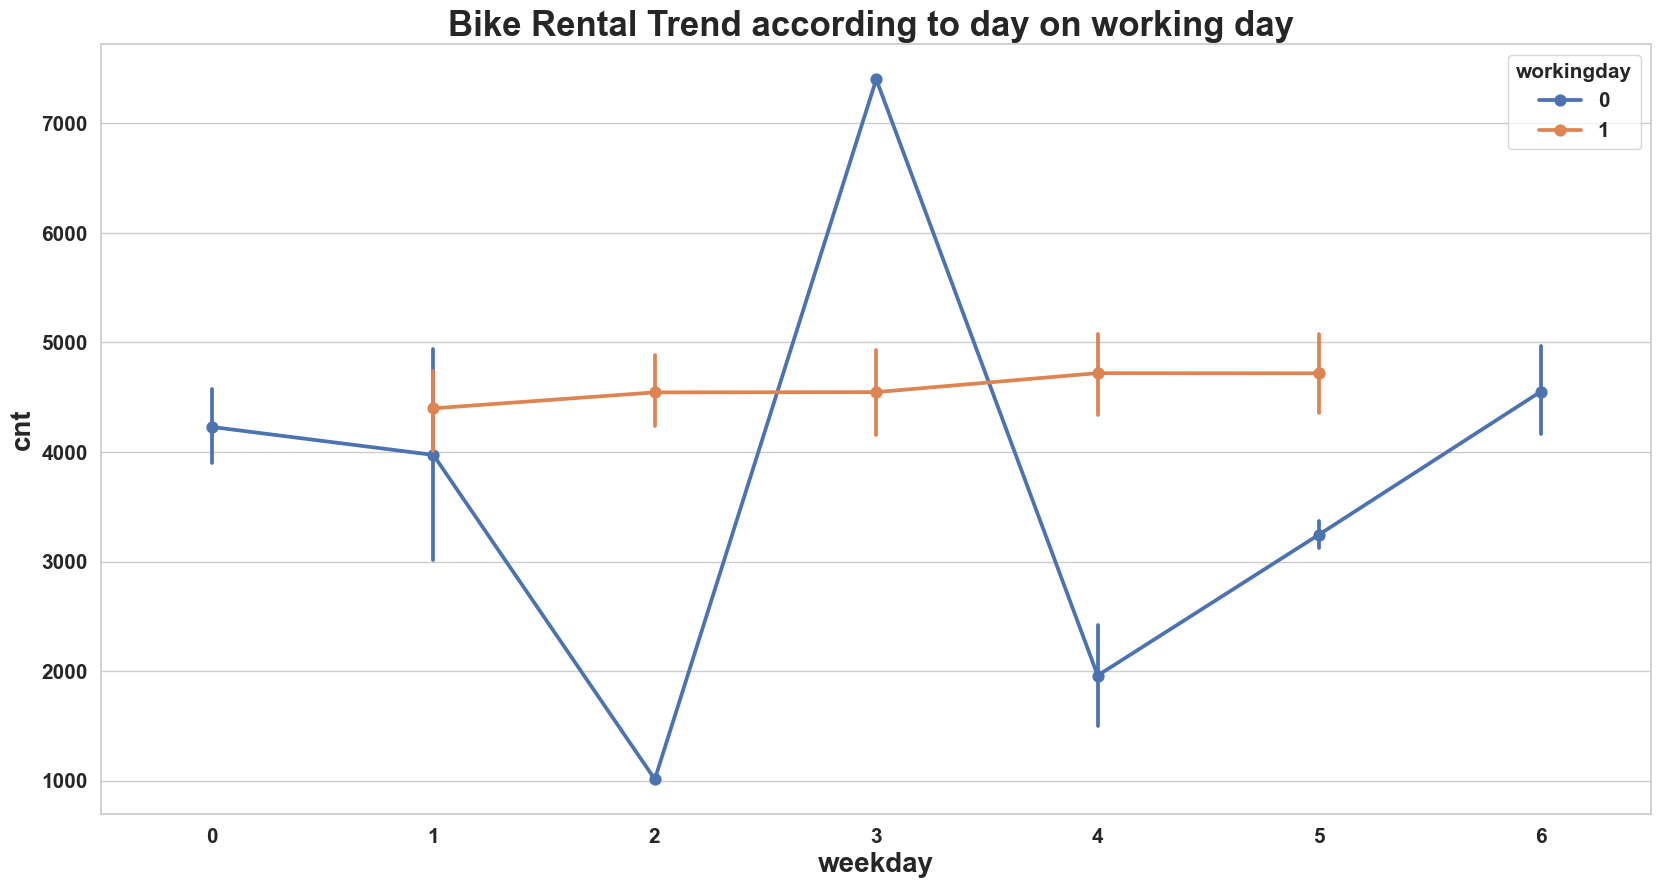

In [39]:
# Bike Rental trend with respect to day on working day.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['workingday'])
plt.title("Bike Rental Trend according to day on working day ")

Text(0.5, 1.0, 'Bike Rental Trend according to season on weekday')

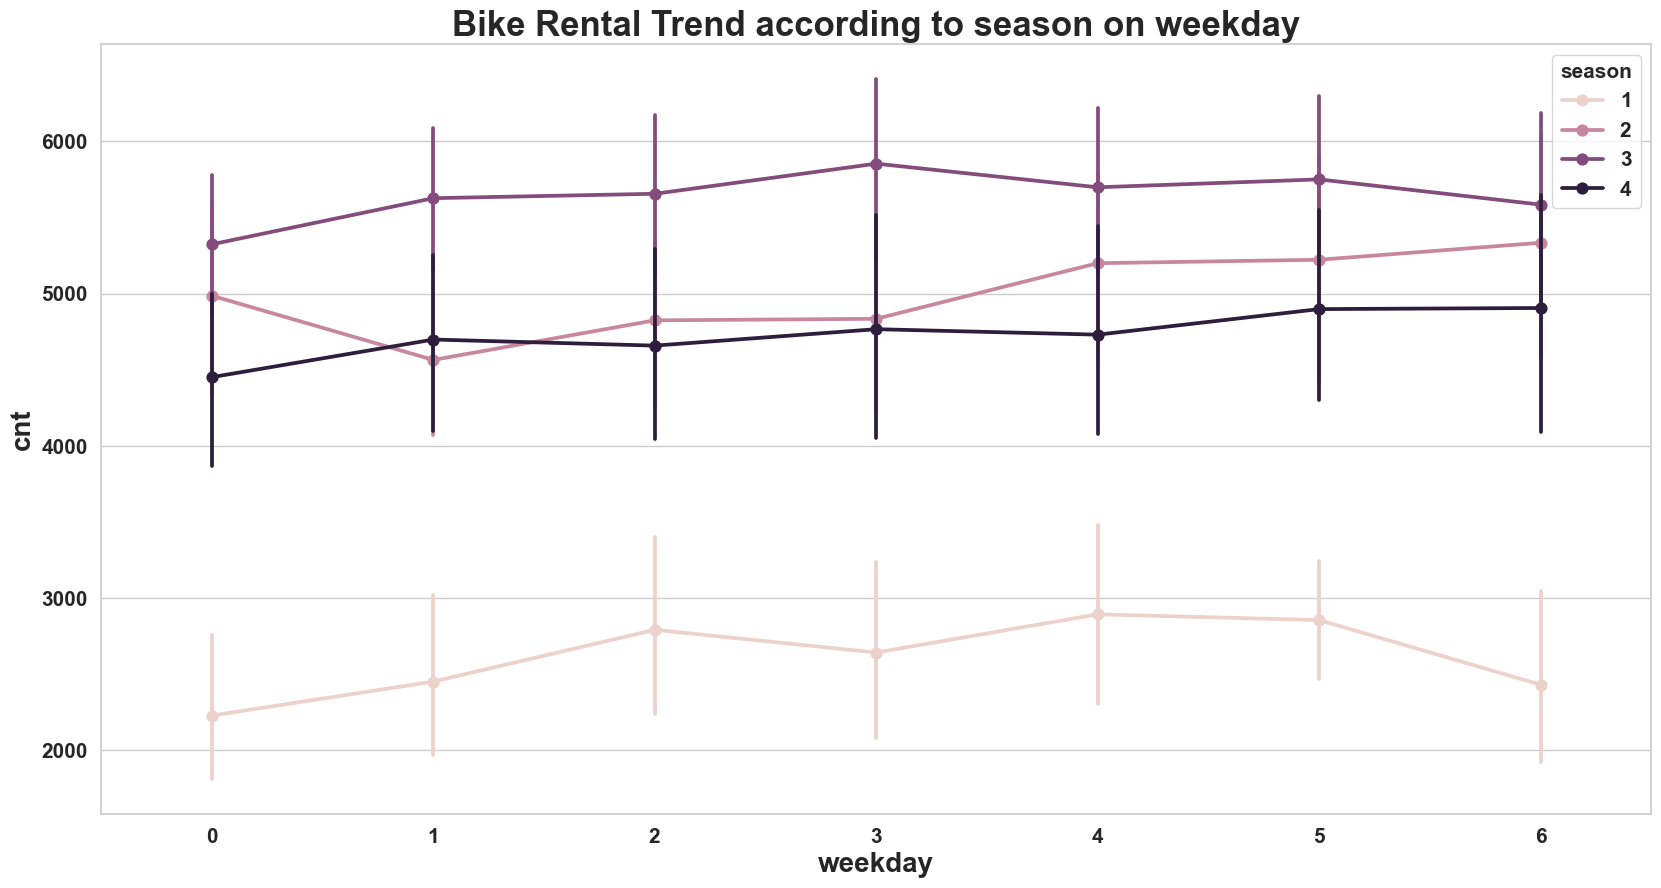

In [41]:
# Bike Rental trend with respect to Hour on Months.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to season on weekday")

Text(0.5, 1.0, 'Bike Rental Trend according to season on month')

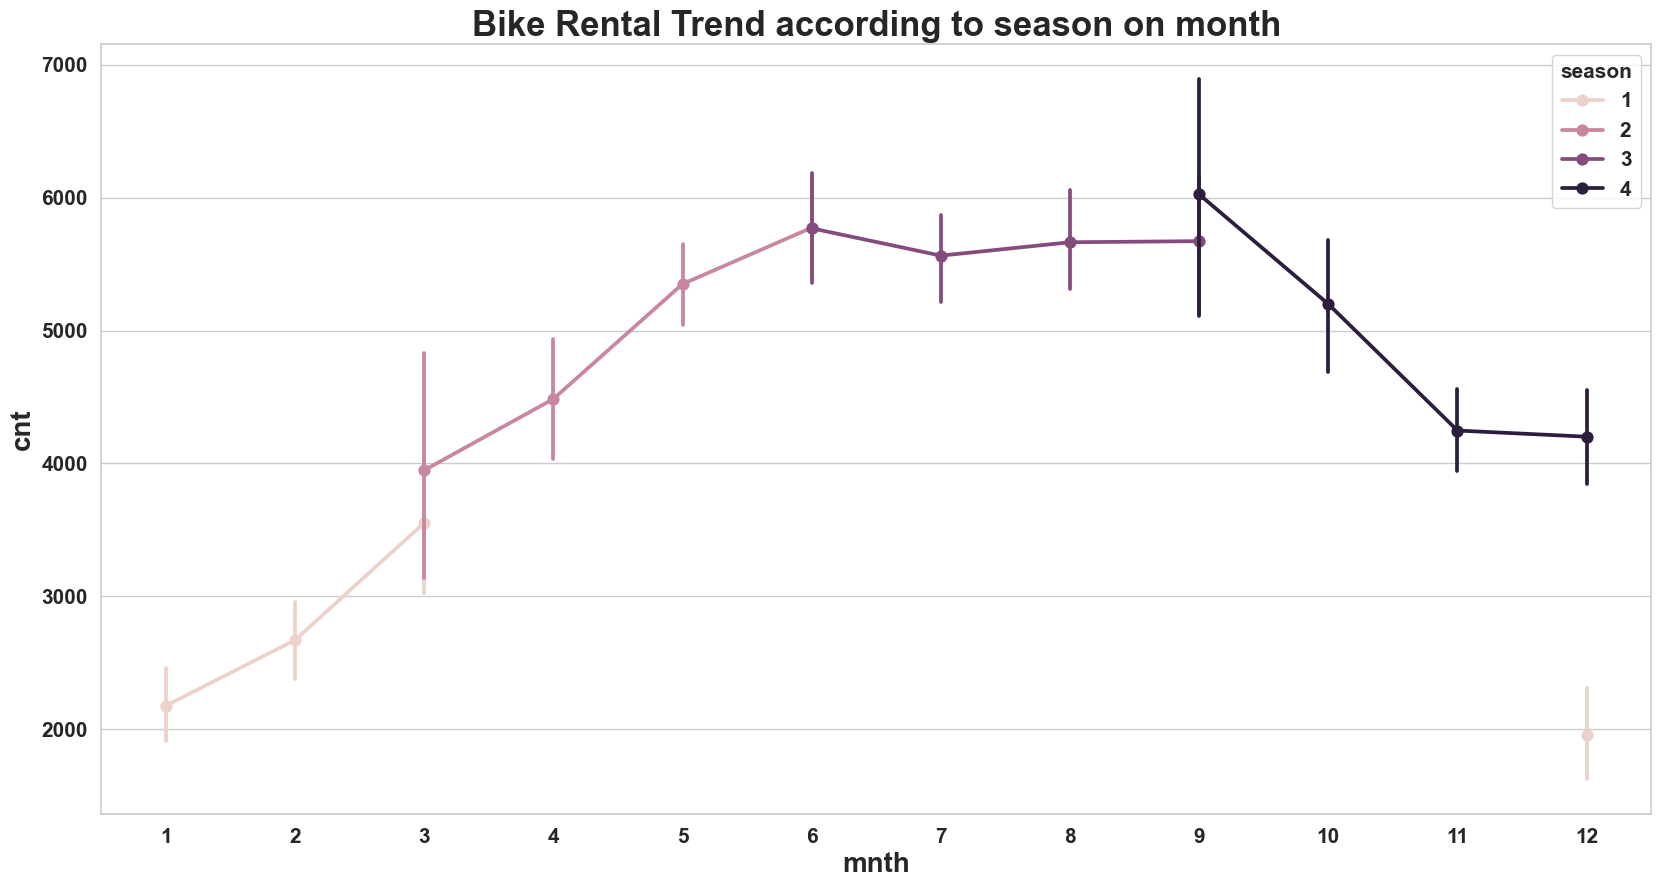

In [40]:
# Bike Rental trend with respect to months on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['mnth'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to season on month")

Bike rental demand follows a predictable annual pattern:

It is lowest in Winter (Season 4 and early Season 1),
Rises sharply through Spring (Season 1),
Reaches its most stable and highest level during Summer (Season 2) and Fall (Season 3).
drops steeply in late Winter (Season 4).
The overall annual peak occurs in September (9), and the lowest point is in December (12) and January (1).

Text(0.5, 1.0, 'Bike Rental Trend according to season on weekday')

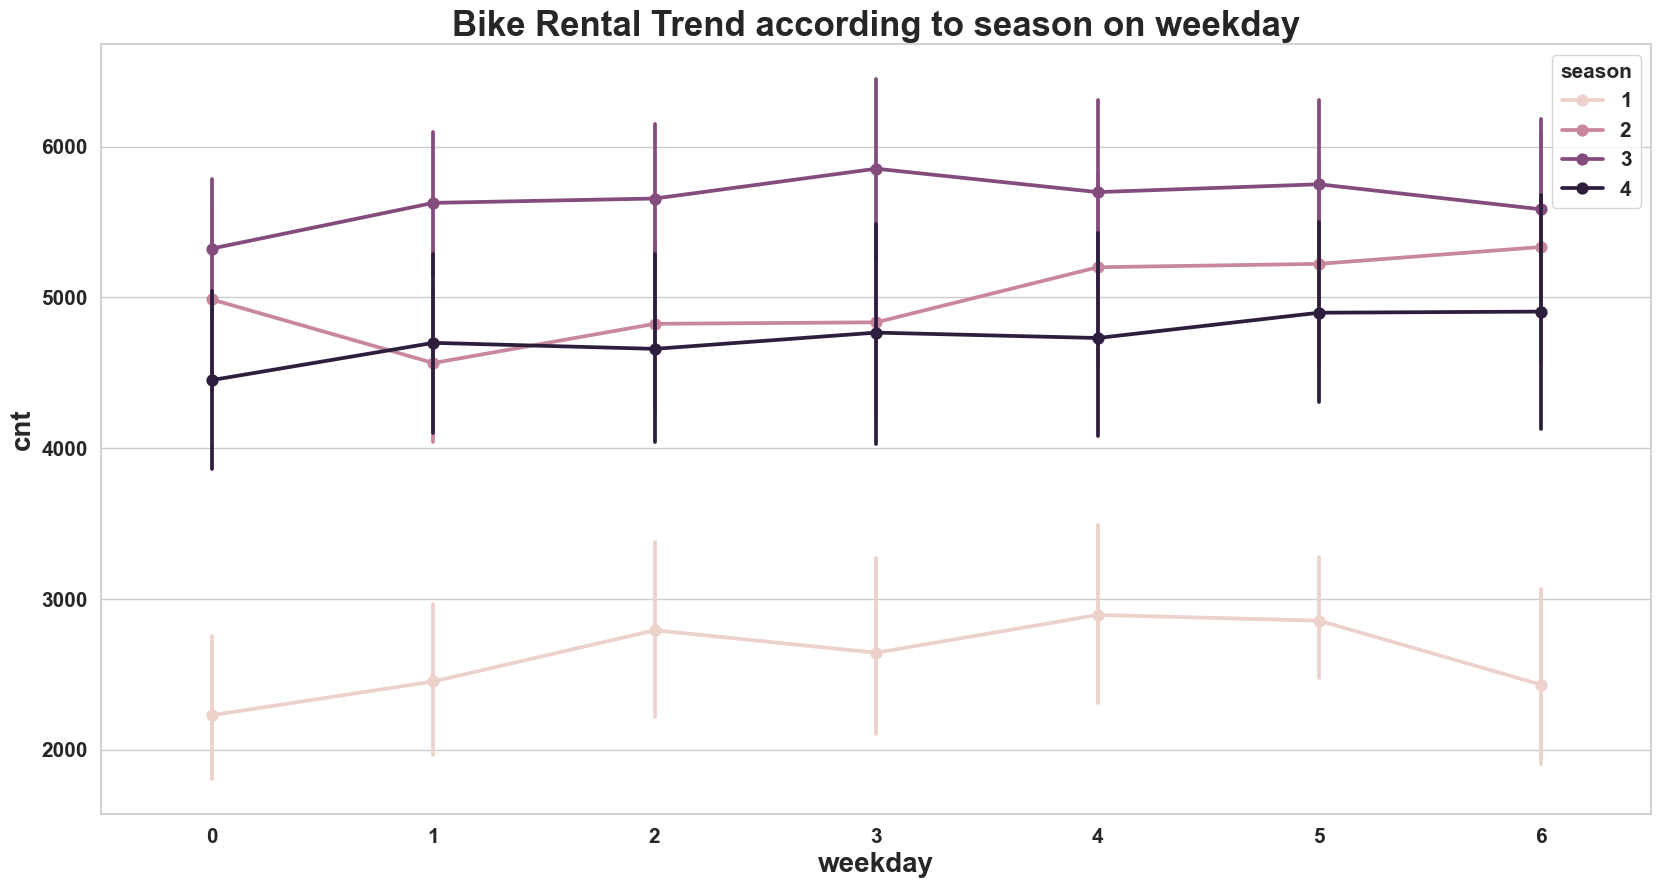

In [42]:
# Bike Rental trend with respect to Hour on Months.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to season on weekday")

1.Fall (3) has the highest and most stable demand , followed closely by Summer (2), which shows an increasing trend toward the weekend.

2.Winter (4) is the most consistently used throughout the week.

3.Spring (1) has the lowest demand and the highest daily volatility across the entire year.

Distribution of target variable

<Axes: xlabel='cnt'>

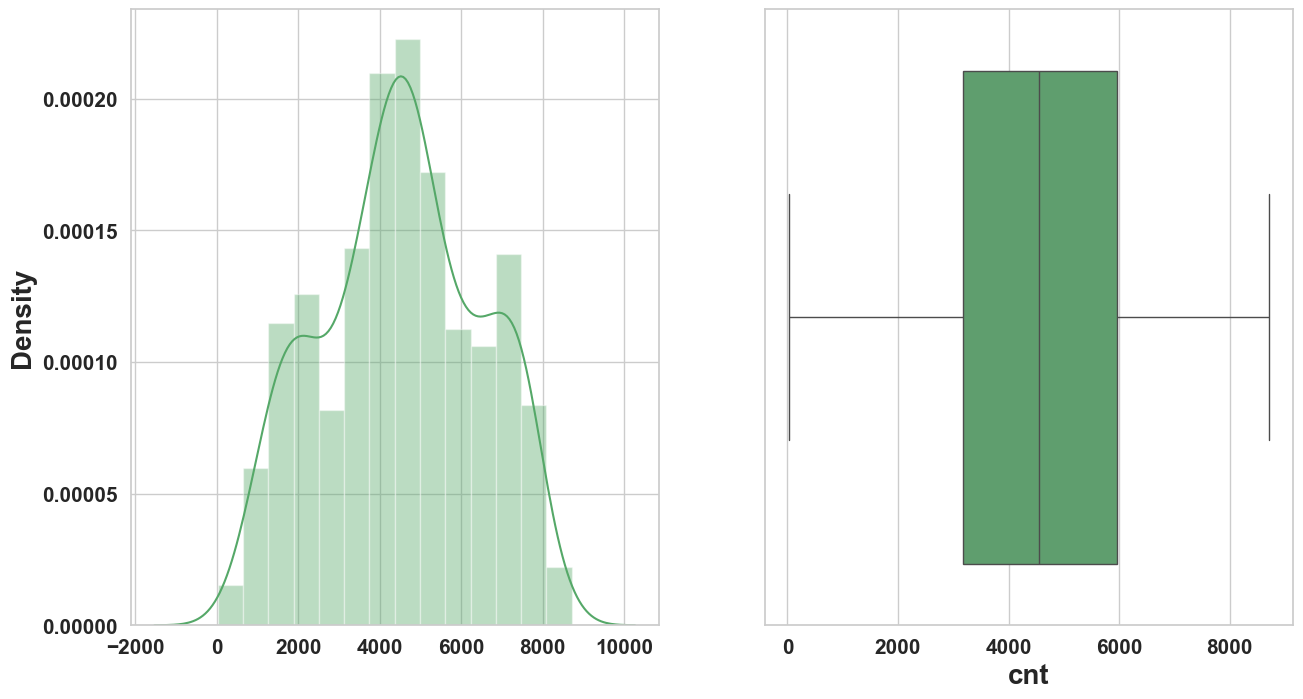

In [43]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='g',ax=axes[0])
sns.boxplot(x = df['cnt'],color='g',ax=axes[1])

In box plot we can see that there are no outliers present

Univariate Analysis

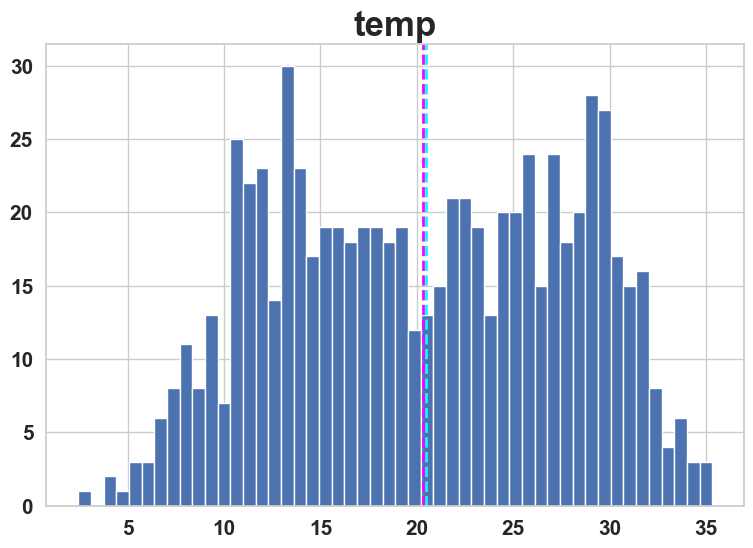

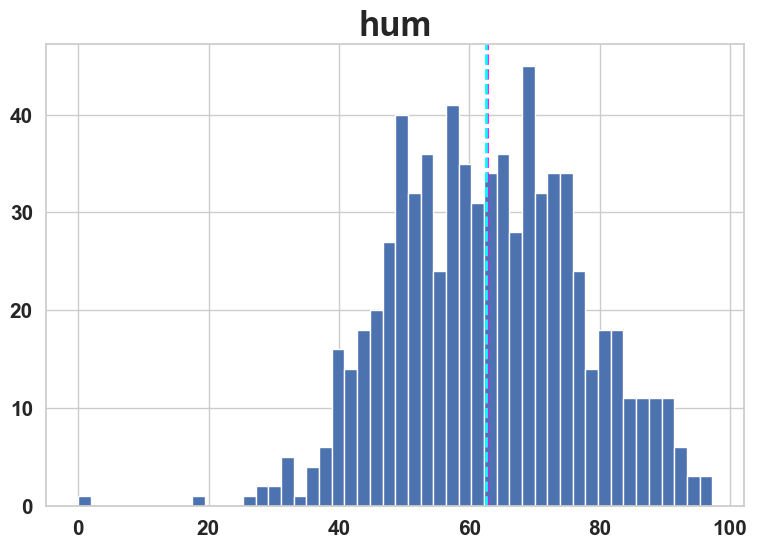

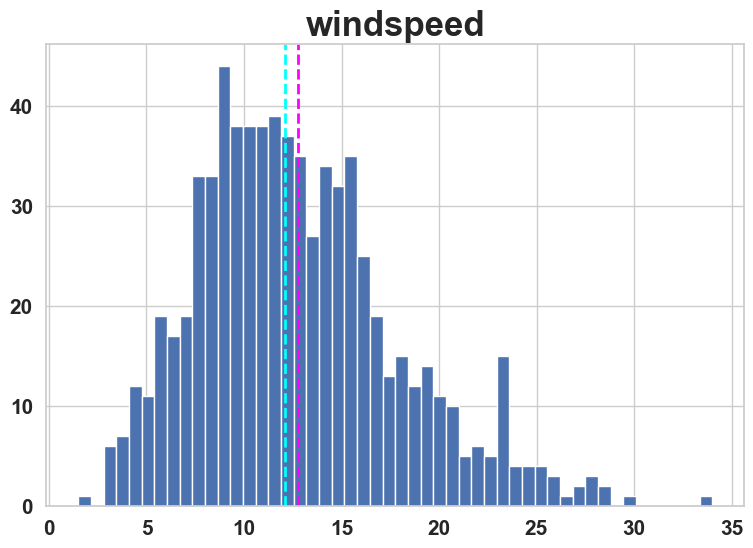

In [44]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

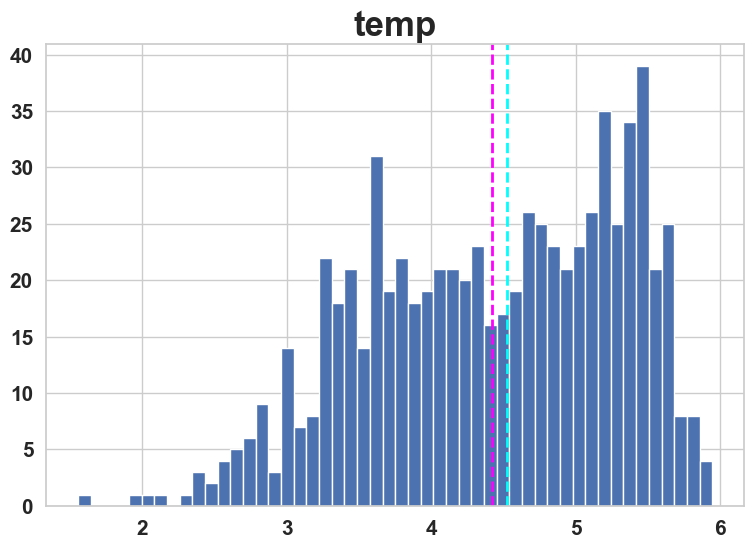

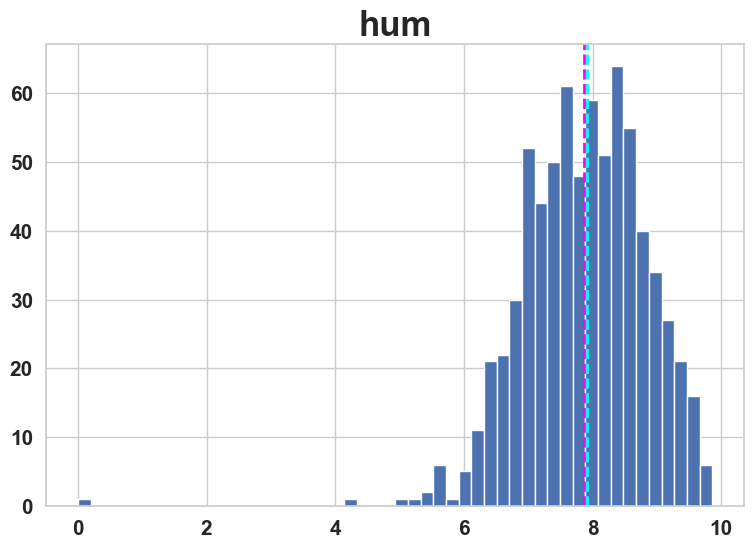

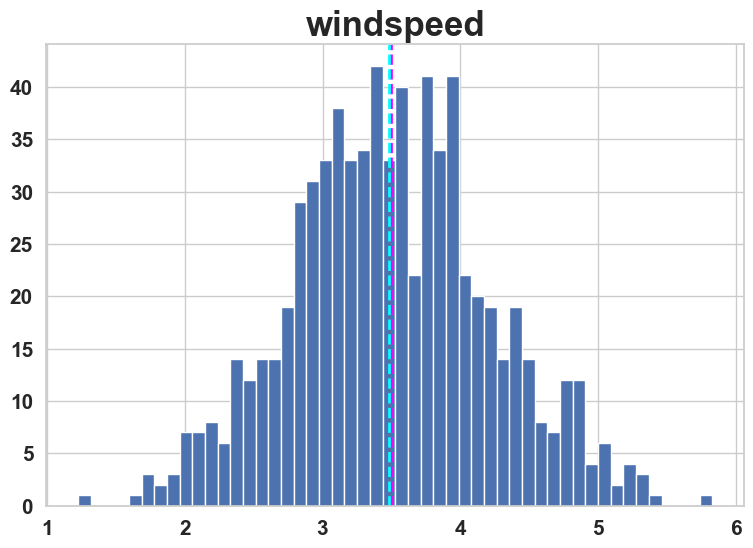

In [45]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

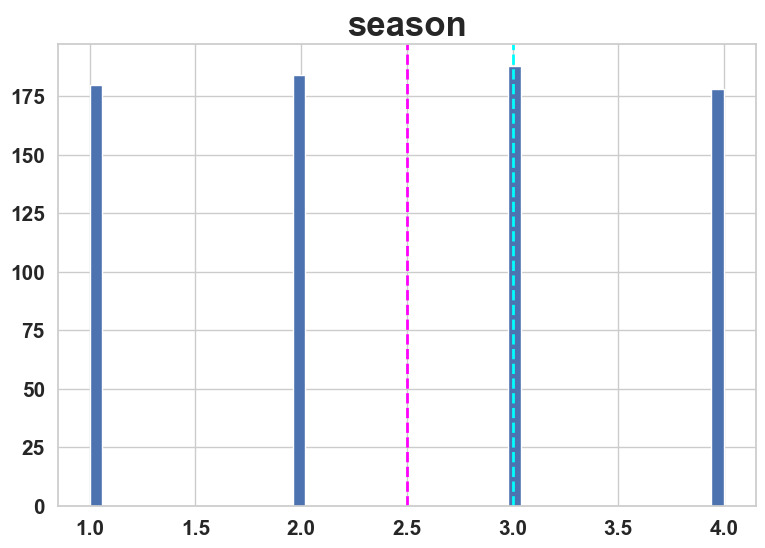

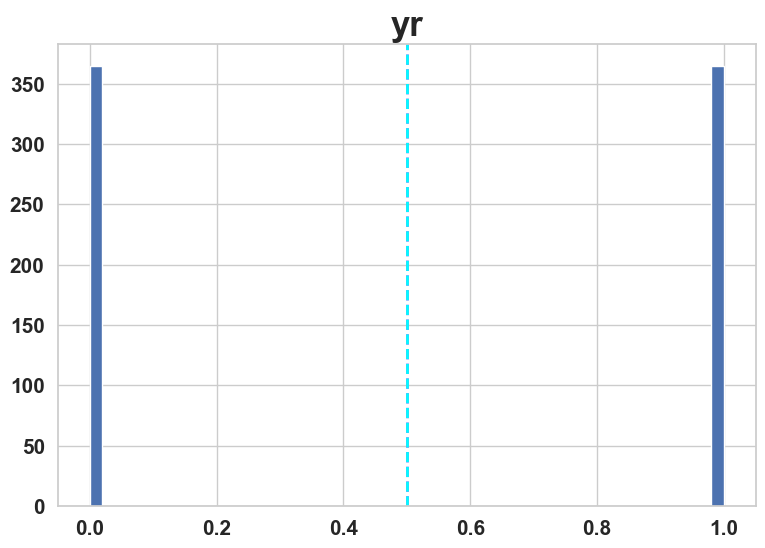

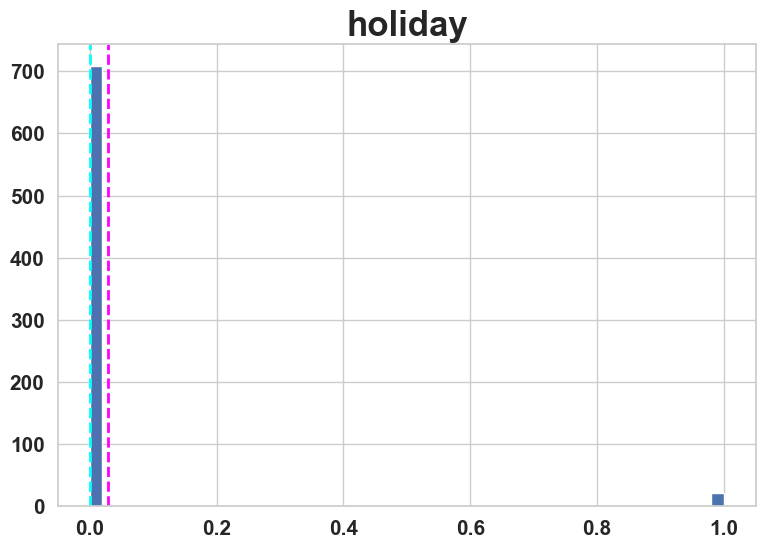

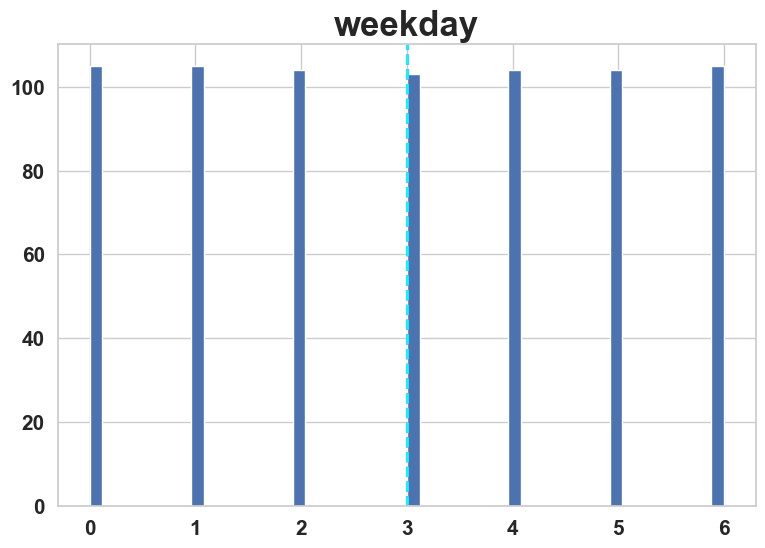

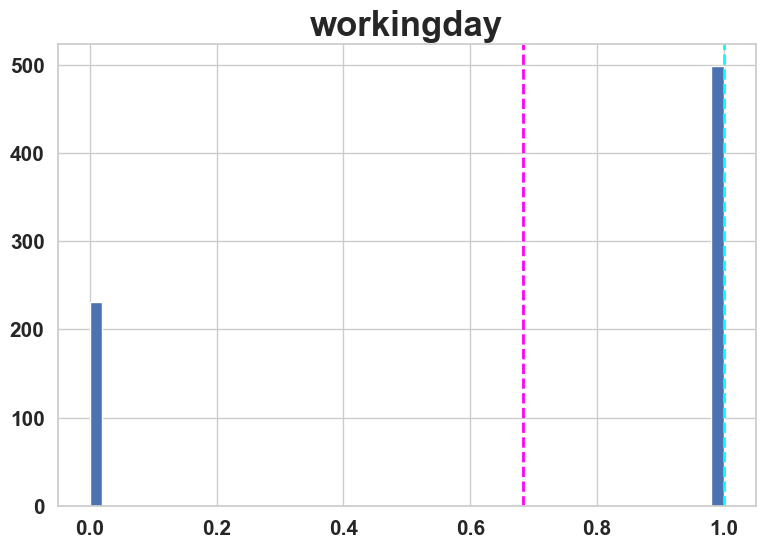

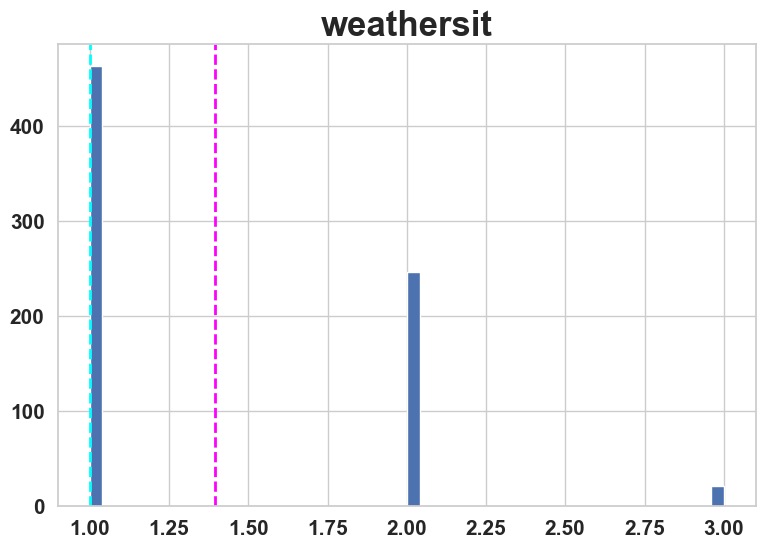

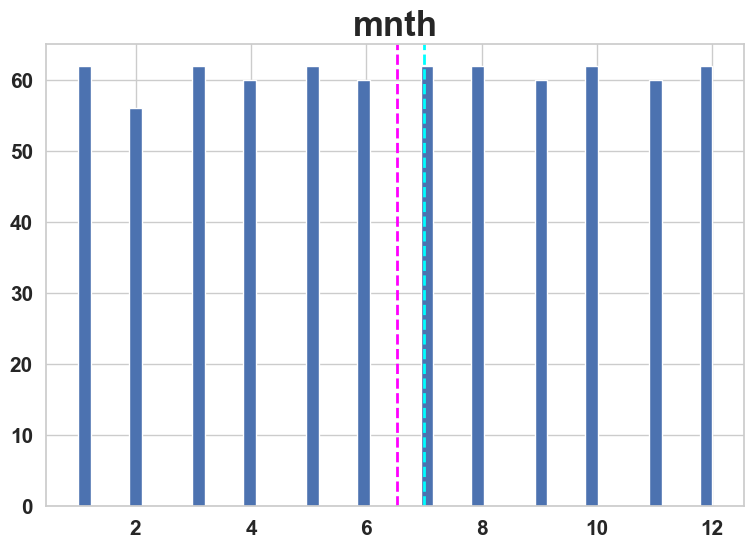

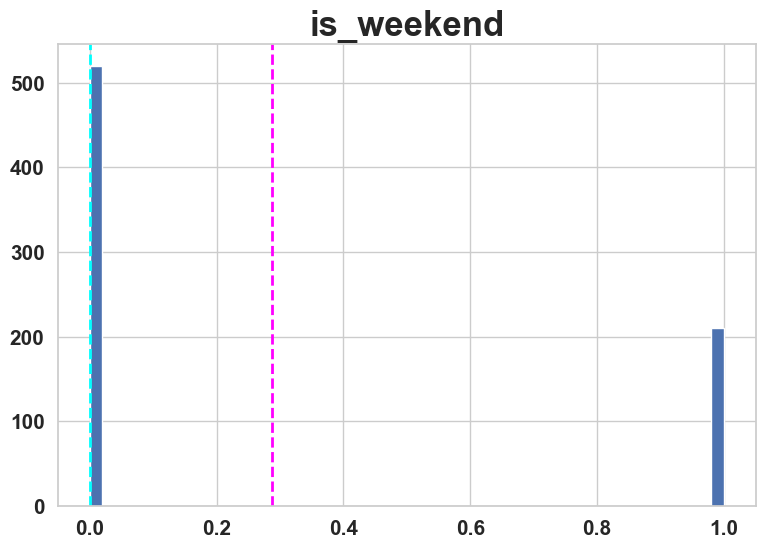

In [47]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

Bivariate Analysis

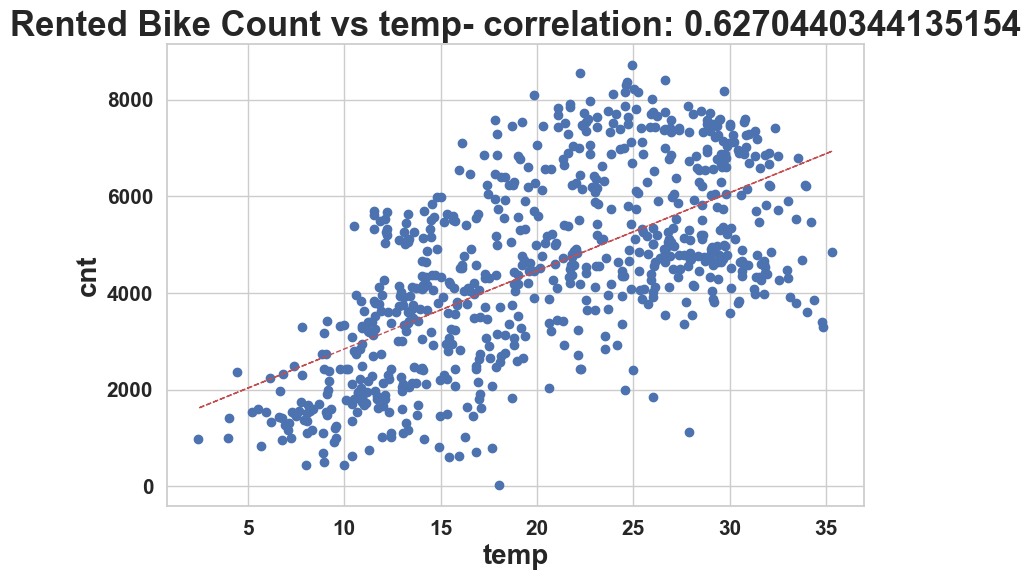

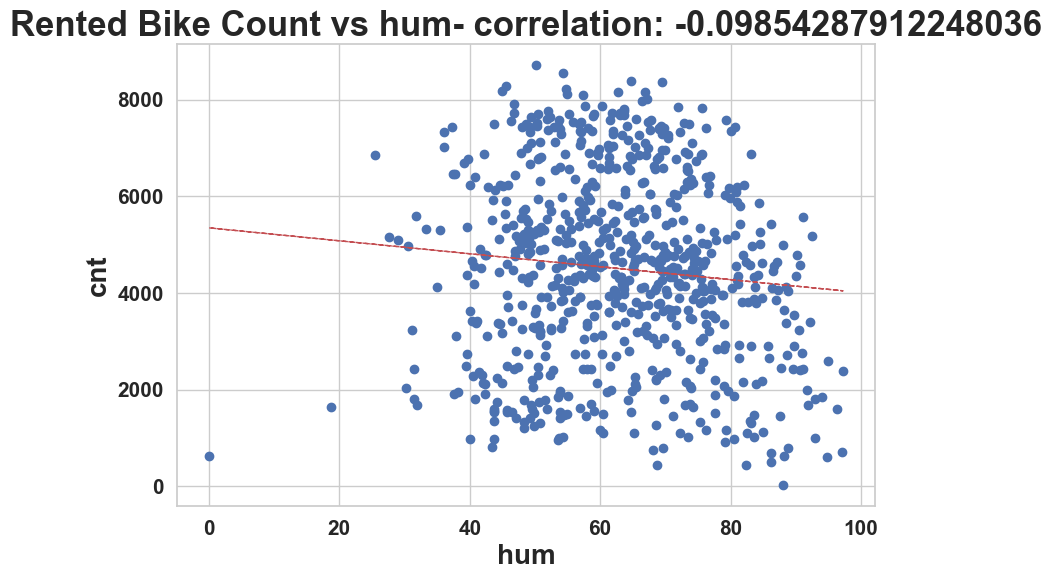

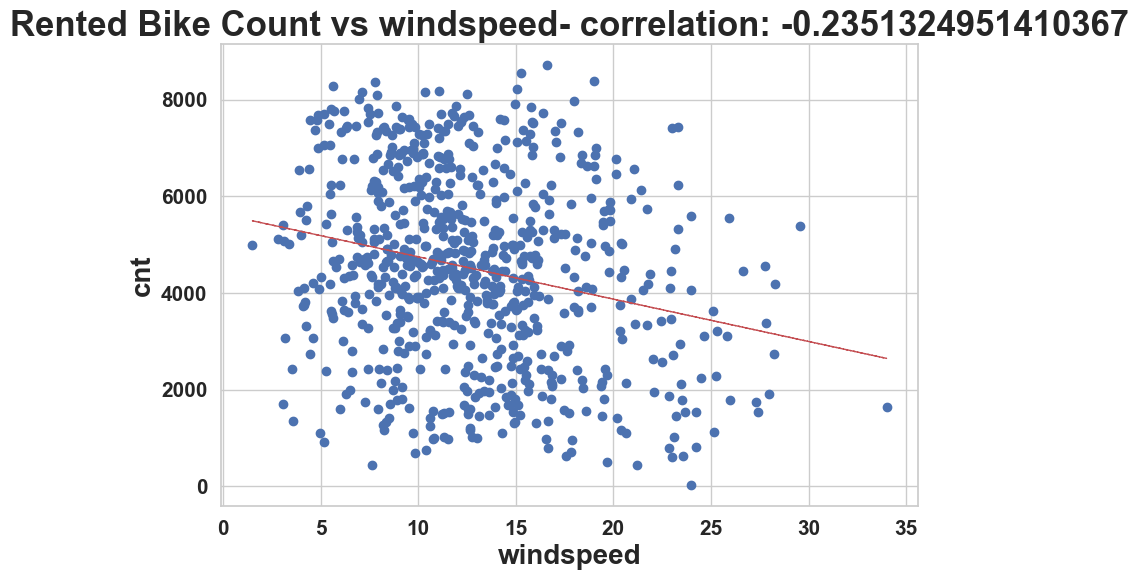

In [48]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

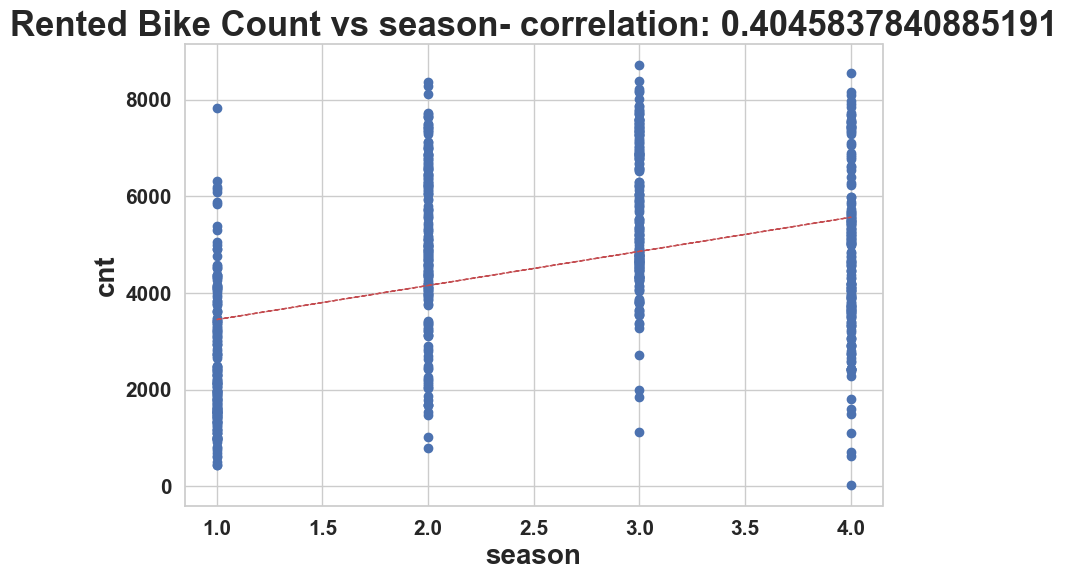

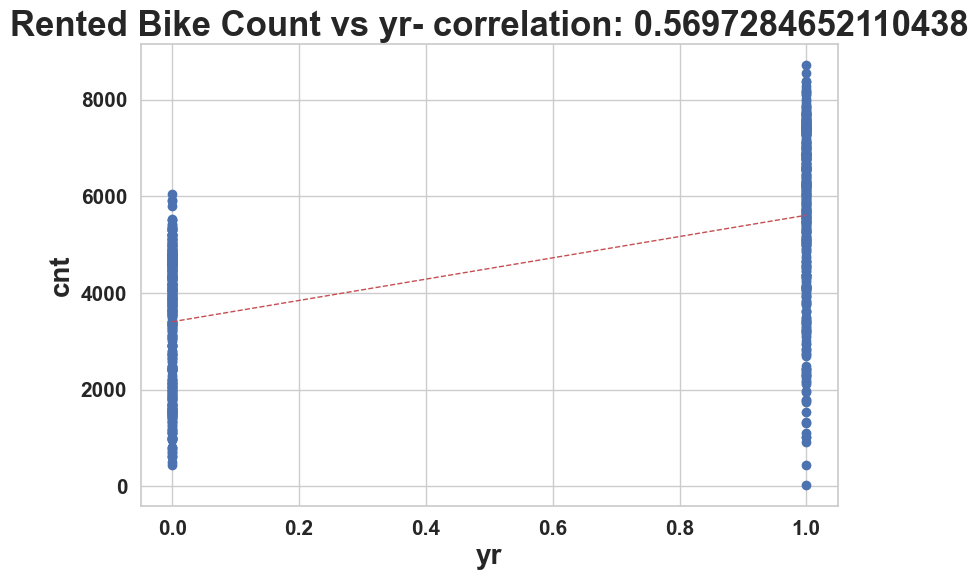

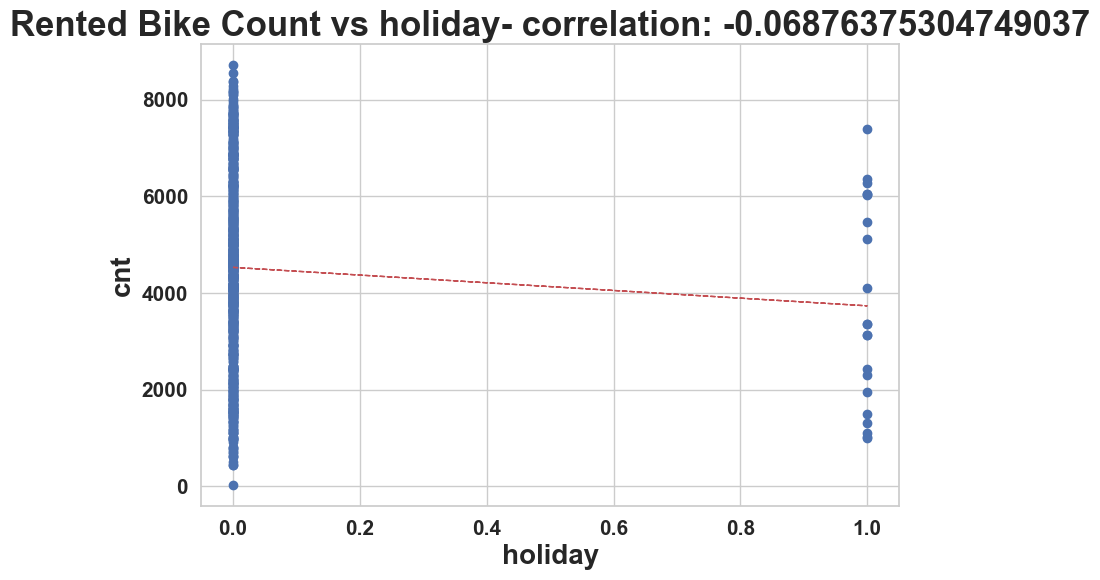

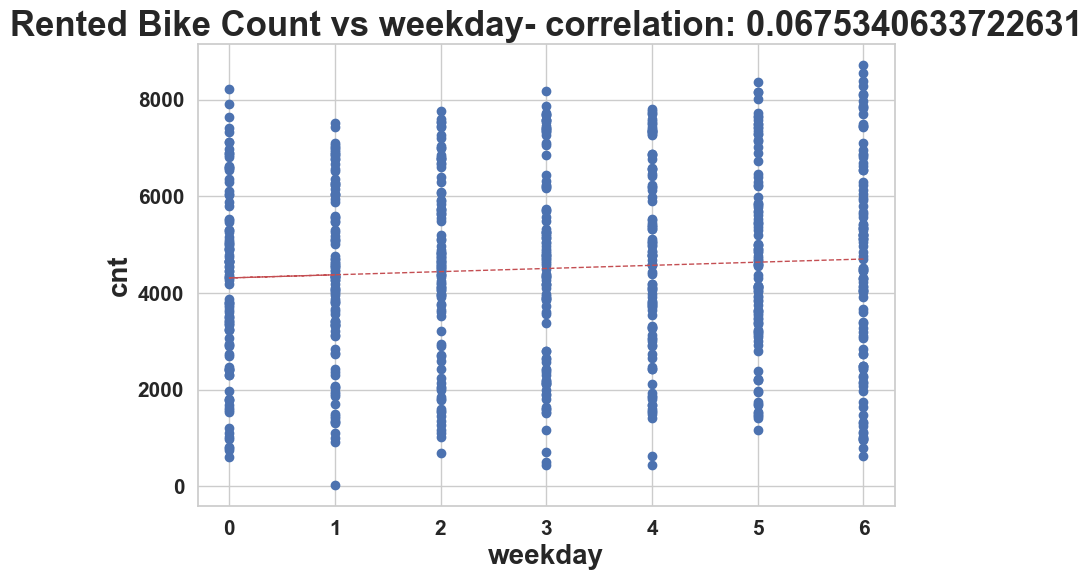

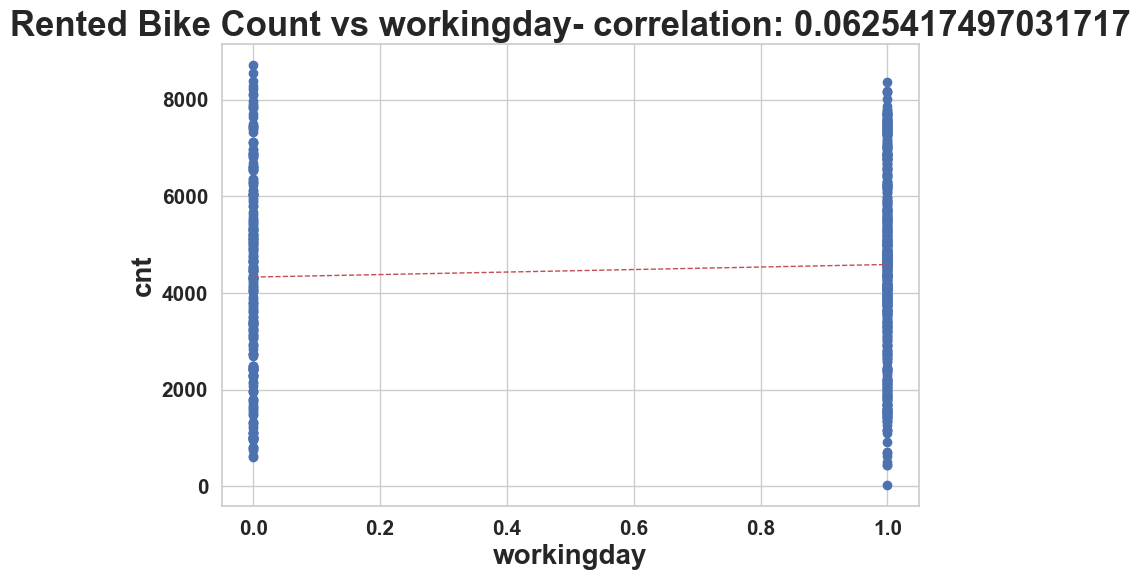

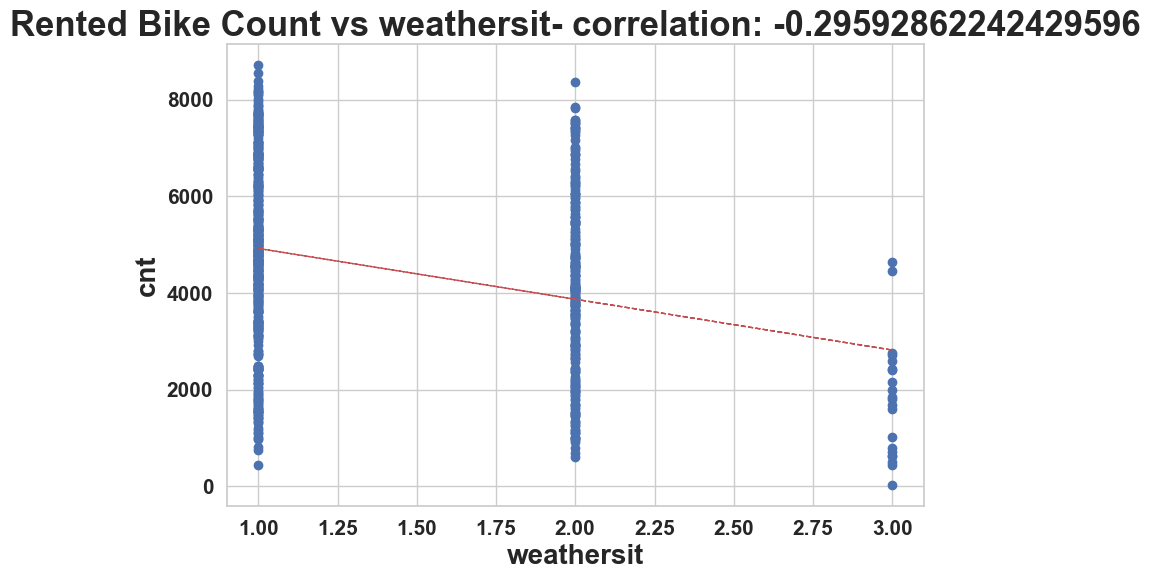

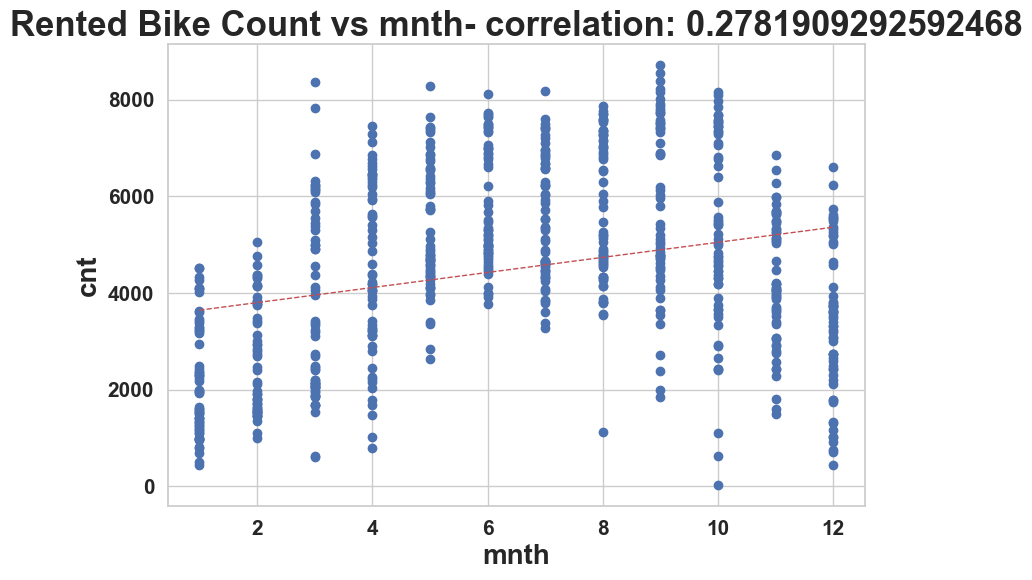

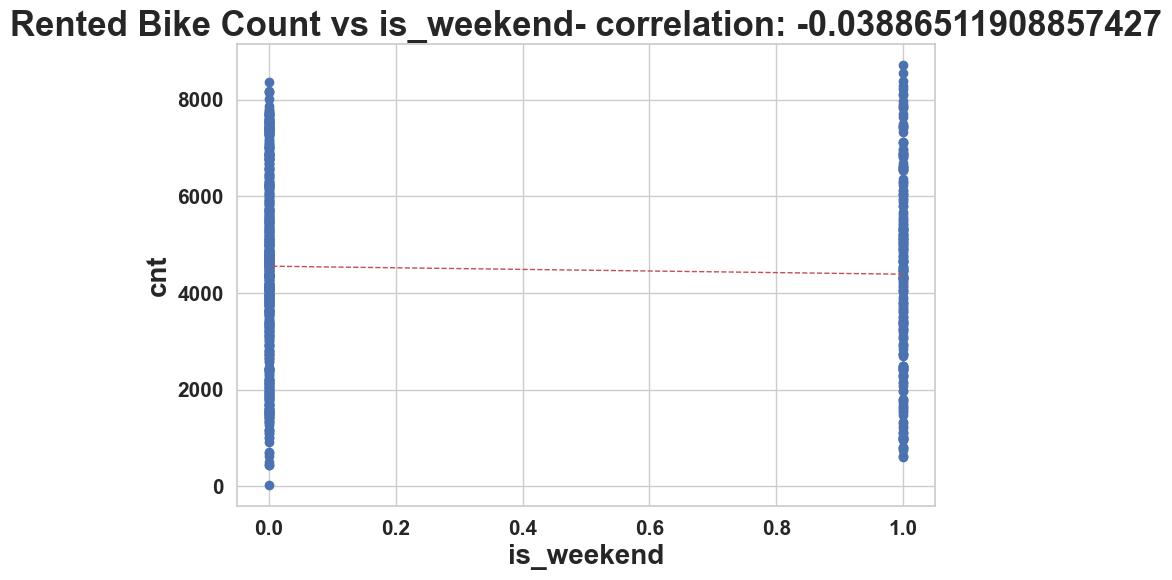

In [49]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

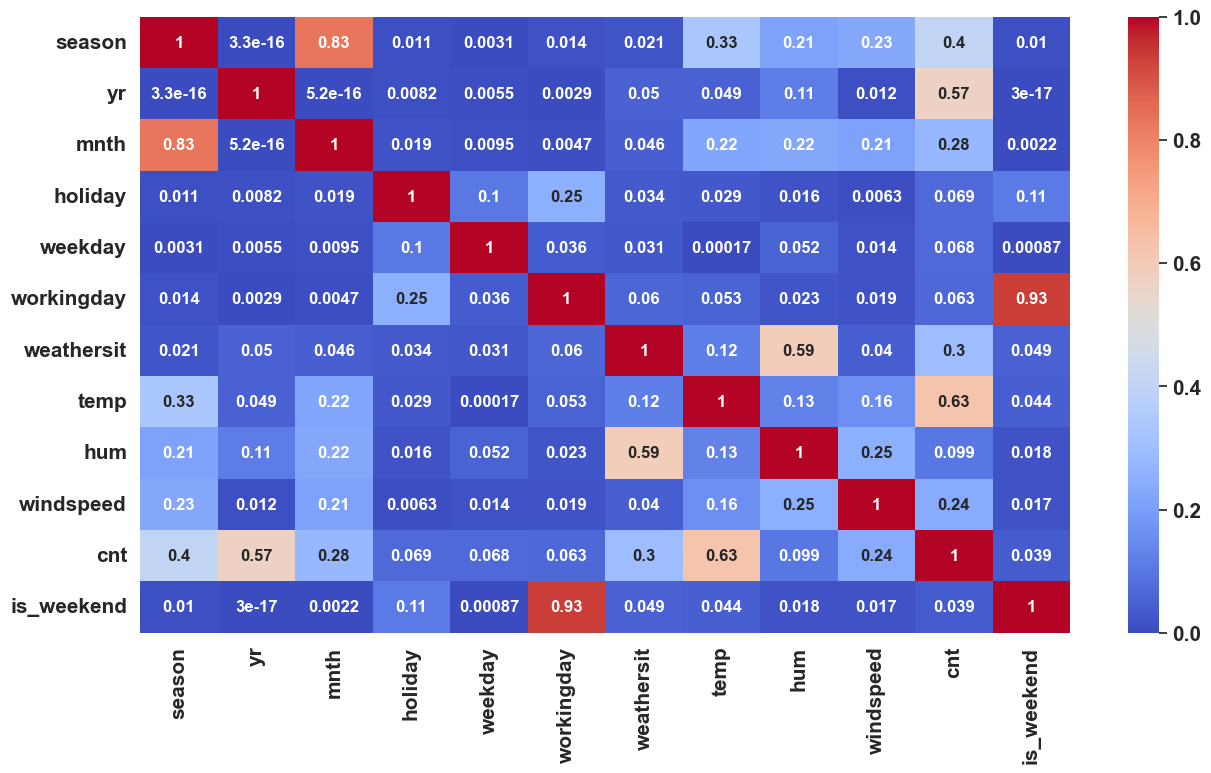

In [50]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [51]:
# Make copy of dataset
df = df.copy()

In [52]:
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,is_weekend
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1


Observation
Numeric features
1.As the temperature (or "feels like" temperature) increases, the number of bike rentals also increases significantly. People prefer to cycle in warmer weather. 2.The relationship is generally weaker. High humidity might slightly deter riders, but it's not a dominant factor like temperature. 3.The relationship is often weak or slightly negative. Very high wind speeds can deter cycling, but the overall trend across the entire range is subtle.

Categorical features
1.Seasonal Trends (season) are strong positive correlation between the season and the rental count.

Observation: The median rental counts increase significantly from Season 1 (Spring), which typically has the lowest demand, to Season 3 (Fall/Autumn), which shows the highest median rentals and overall range.

2.The yr variable (Year) is a very strong predictor, capturing the overall increase in the popularity and adoption of the bike-sharing system.

3.Weather Condition (weathersit) is Adverse weather severely impacts bike usage.

Weather Situation 1 (Clear, few clouds) has the highest median and total rental counts.

Weather Situation 2 (Mist, cloudy) shows a moderate drop.

Weather Situation 3 (Light rain/snow) shows a drastic drop to the lowest median counts.

Weather Situation 4 (Heavy rain/snow/ice, if present) would typically show almost zero rentals, though it may be rare or absent in the daily dataset.

4.The monthly rental trend aligns with the seasonal trend, showing peak demand during mid-year months.

5.Week day trends: The monthly rental trend aligns with the seasonal trend, showing peak demand during mid-year months. It is less impactful than the weather or seasonal variables.

6.Working Day vs. Non-Working Day (workingday) Total demand is not dramatically different between working and non-working days.